In [ ]:
import numpy as np
import matplotlib.pyplot as plt
int_type=[0,12]
string_type=[1,6,7,10]
float_type=[2,3,4,5,8,9,11]

In [ ]:
import csv
data_csv_path='beer_reviews.csv'
def charger_donnees(data_csv_path_,delimiter_):
  with open(data_csv_path_, newline='',encoding='utf8') as csvfile:
    csvreader=csv.reader(csvfile,delimiter=delimiter_)
    header_=next(csvreader)
    my_data = np.array(list(csvreader))
    my_data = np.delete(my_data,np.where(my_data[:,11]==''),axis=0)
    data_={}
    for i in int_type:
      data_[header_[i]]=np.array(my_data[:,i],dtype=int)
    for i in float_type:
      data_[header_[i]]=np.array(my_data[:,i],dtype=float)
    for i in string_type:
      data_[header_[i]]=np.array(my_data[:,i],dtype=str)
  return data_,header_
data,entete=charger_donnees(data_csv_path,',')

In [ ]:
from tabulate import tabulate
print(tabulate([entete],headers='keys',tablefmt="fancy_grid"))

╒════════════╤══════════════╤═════════════╤════════════════╤══════════════╤═══════════════════╤════════════════════╤════════════╤═══════════════╤══════════════╤═══════════╤══════════╤═════════════╕
│ 0          │ 1            │ 2           │ 3              │ 4            │ 5                 │ 6                  │ 7          │ 8             │ 9            │ 10        │ 11       │ 12          │
╞════════════╪══════════════╪═════════════╪════════════════╪══════════════╪═══════════════════╪════════════════════╪════════════╪═══════════════╪══════════════╪═══════════╪══════════╪═════════════╡
│ brewery_id │ brewery_name │ review_time │ review_overall │ review_aroma │ review_appearance │ review_profilename │ beer_style │ review_palate │ review_taste │ beer_name │ beer_abv │ beer_beerid │
╘════════════╧══════════════╧═════════════╧════════════════╧══════════════╧═══════════════════╧════════════════════╧════════════╧═══════════════╧══════════════╧═══════════╧══════════╧═════════════╛


# I - Présentation des données

review_time : 


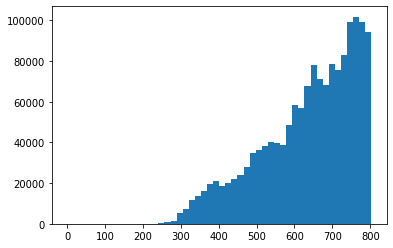

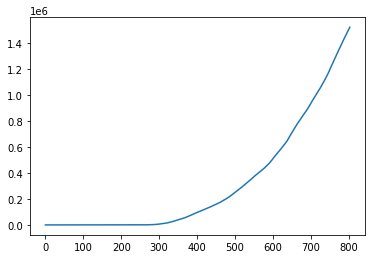

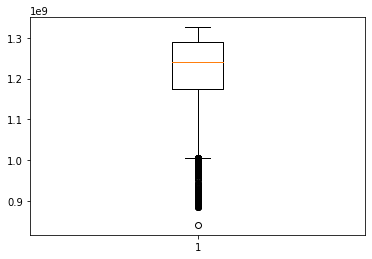

review_overall : 


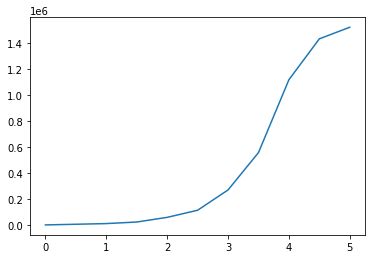

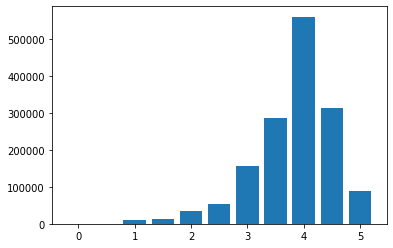

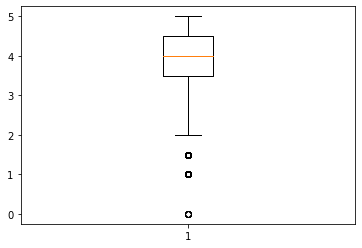

review_aroma : 


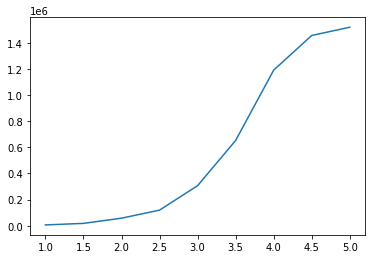

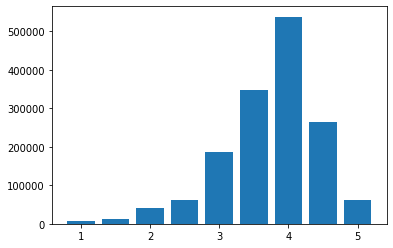

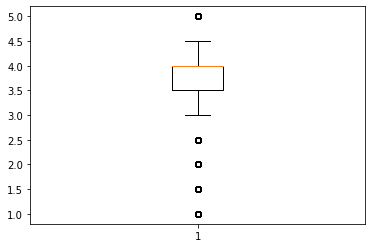

review_appearance : 


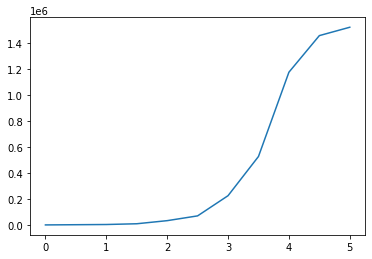

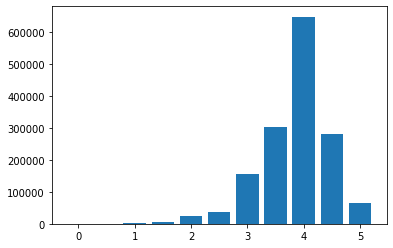

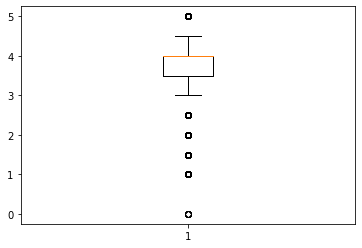

review_palate : 


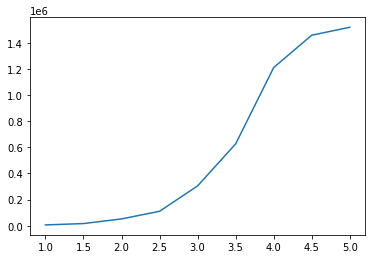

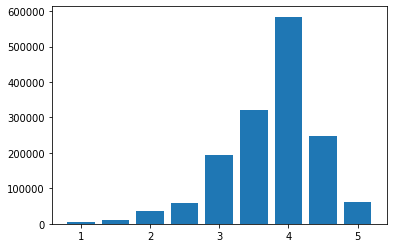

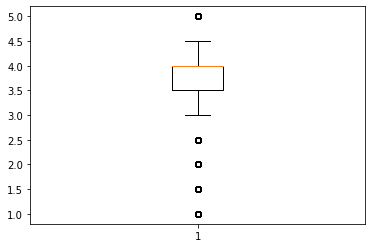

review_taste : 


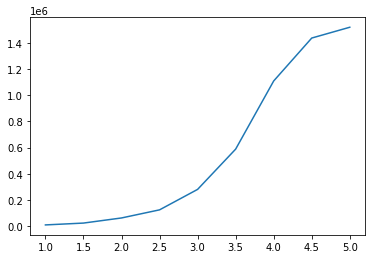

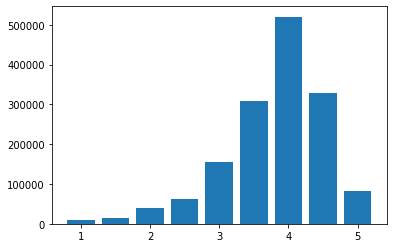

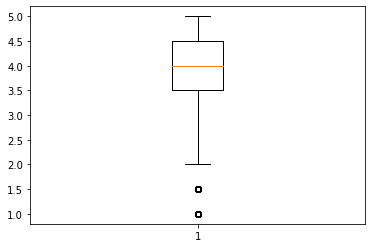

beer_abv : 


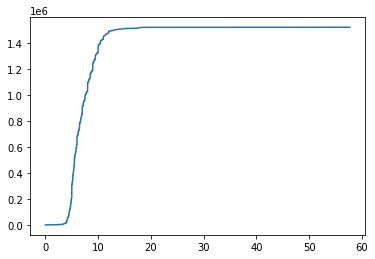

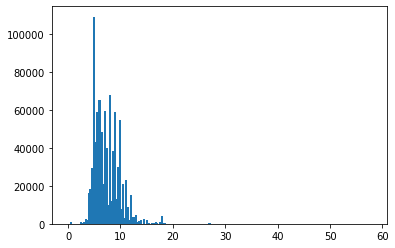

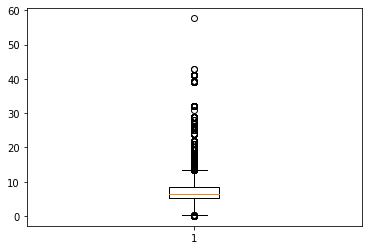

In [ ]:
for mon_indice in float_type :
    tab = data[entete[mon_indice]]
    print(entete[mon_indice]+' : ')
    if mon_indice == 2 :
        tab = (((tab-np.min(tab))/3600)/24)/7
        plt.hist(tab, bins=50)
        plt.show()
    n1, = tab.shape
    valeur, effectif = np.unique(tab, return_counts=True)
    plt.plot(valeur,np.cumsum(effectif))
    plt.show()
    if (mon_indice != 2) and (mon_indice != 10) :
        plt.bar(valeur, effectif, width=0.4)
        plt.show()
    if mon_indice == 10 :
        plt.hist(tab)
        plt.show()
    plt.boxplot(data[entete[mon_indice]])
    plt.show()

review_overall représente 3 pourcents de la variance des données.
review_aroma représente 5 pourcents de la variance des données.
review_appearance représente 7 pourcents de la variance des données.
review_palate représente 9 pourcents de la variance des données.
review_taste représente 15 pourcents de la variance des données.
beer_abv représente 61 pourcents de la variance des données.


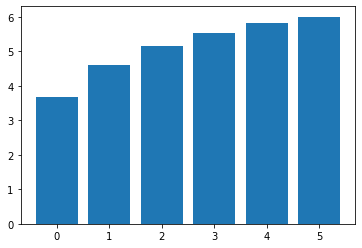

[[1.         0.61282591 0.49857613 0.69904021 0.78719296 0.13851154]
 [0.61282591 1.         0.55910639 0.61493985 0.71478773 0.33257006]
 [0.49857613 0.55910639 1.         0.5645548  0.54459158 0.26394077]
 [0.69904021 0.61493985 0.5645548  1.         0.73222025 0.28671063]
 [0.78719296 0.71478773 0.54459158 0.73222025 1.         0.29082724]
 [0.13851154 0.33257006 0.26394077 0.28671063 0.29082724 1.        ]]


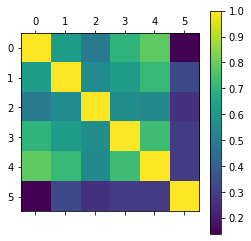

In [ ]:
noms = [entete[3],entete[4],entete[5],entete[8],entete[9],entete[11]]
mon_x = np.column_stack((data[entete[3]],data[entete[4]],data[entete[5]],data[entete[8]],data[entete[9]],data[entete[11]]))
n,p = mon_x.shape
mu, std = np.mean(mon_x, axis=0), np.std(mon_x, axis=0)
mon_xr = (mon_x - mu)/std
corr = (mon_xr.T @ mon_xr)/n
from numpy.linalg import eigh
eigval, eigvec = eigh(corr)
for i in range(p) : 
    print(noms[i]+' représente '+str(int(np.round(eigval[i]/np.sum(eigval)*100)))+' pourcents de la variance des données.')
plt.bar(np.arange(6),np.cumsum(eigval[::-1]))
plt.show()
print(corr)
plt.matshow(corr)
plt.colorbar()
plt.show()

# II - Régression Linéaire


1 - nb de réponses au formulaire par semaine

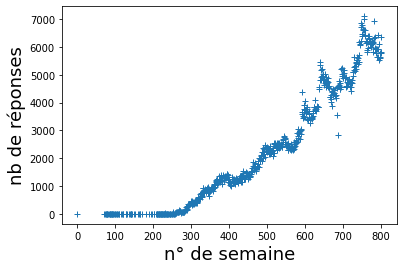

In [ ]:
#on arrondit nos valeurs à la semaine près
dates_semaine=data['review_time']//(3600*24*7)
#on recentre tout par rapport à la première semaine
semaine1=np.min(dates_semaine)
dates_semaine=dates_semaine-semaine1
#on calcule le nombre d'observation chaque semaine
msemaine,nsemaine=np.unique(dates_semaine,return_counts=True)

plt.plot(msemaine,nsemaine,'+')
plt.xlabel('n° de semaine', fontsize=18)
plt.ylabel('nb de réponses', fontsize=18)
plt.show()

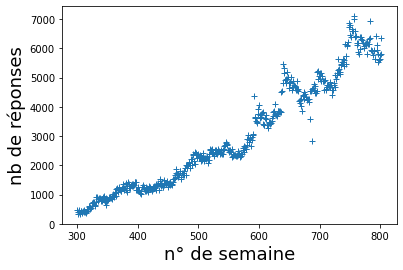

In [ ]:
#on peut supposer une linéarité à partir d'un n° de semaine >300
x=np.delete(msemaine,np.where(msemaine<300))
y=np.delete(nsemaine,np.where(msemaine<300))
plt.plot(x,y,'+')
plt.xlabel('n° de semaine', fontsize=18)
plt.ylabel('nb de réponses', fontsize=18)
plt.show()

In [ ]:
from numpy.linalg import solve
def reg(x_,y_):
  n_=x_.shape[0]
  X_=np.column_stack((x_,np.ones(n_)))
  p=X_.shape[1]-1
  alpha_=solve(X_.T@X_,X_.T@y_)
  z_=X_@alpha_
  my_=np.mean(y_)
  SCM=np.sum((z_-my_)**2)
  SCT=np.sum((y_-my_)**2)
  R2_=SCM/SCT
  e_=y_-z_
  s2_=np.sum(e_**2/(n_-2))
  H_ = X_@np.linalg.solve(X_.T@X_,X_.T)
  h_ = np.diag(H_)
  c_ = h_/((1-h_)**2)*(e_**2)/(p*s2_)
  dv_ = np.stack([e_, h_, c_])
  return alpha_,R2_,s2_,dv_

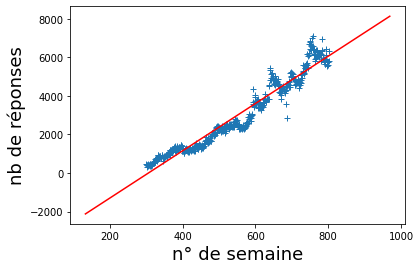

R²= 0.9405170202721685


In [ ]:
alpha,R2,s2,_=reg(x,y)
xmin=x.min()-(x.max()-x.min())/3
xmax=x.max()+(x.max()-x.min())/3
plt.plot(x,y,'+')
plt.plot([xmin, xmax],[xmin*alpha[0]+alpha[1],xmax*alpha[0]+alpha[1]],'-r')
plt.xlabel('n° de semaine', fontsize=18)
plt.ylabel('nb de réponses', fontsize=18)
plt.show()
print('R²=',R2)

In [ ]:
from scipy.stats import t
confiance=0.95
xp=900
yp = xp*alpha[0]+alpha[1]
sx2 = np.sum((x-np.mean(x))**2)
n=x.size
t_s = t.ppf((1-confiance)/2,n-2)#95% de confiance
interval = np.abs(t_s*np.sqrt(s2*(1+1/n+(xp-np.mean(x))**2/sx2)));
print('Pour la',xp,'eme semaine, le nombre de reponses sera à 95% de confiance dans l\'intervalle : \n [',yp-interval,yp+interval,']')

Pour la 900 eme semaine, le nombre de reponses sera à 95% de confiance dans l'intervalle : 
 [ 6399.967419936467 8175.424136247206 ]


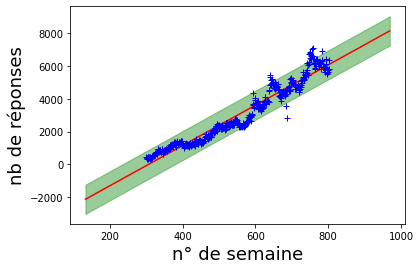

In [ ]:
xp = np.linspace(xmin,xmax,400)
yp = xp*alpha[0]+alpha[1]
interval = t_s*np.sqrt(s2*(1+1/n+(xp-np.mean(x))**2/sx2));
plt.fill_between(xp,yp-interval,yp+interval,color='green',alpha=0.4)
plt.plot([xmin, xmax],[xmin*alpha[0]+alpha[1],xmax*alpha[0]+alpha[1]],'-r')
plt.xlabel('n° de semaine', fontsize=18)
plt.ylabel('nb de réponses', fontsize=18)
plt.plot(x,y,'b+')
plt.show()

2 - Les notes en fonction du taux d'alcool

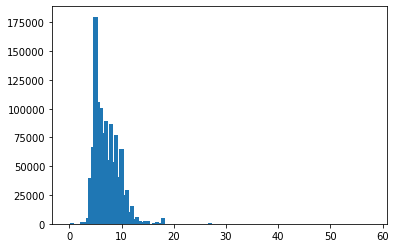

In [ ]:
note_globale=data['review_overall']*100/5
abv_tronque=np.trunc(data['beer_abv']*4)/4#on regroupe par 0.25
m_abv,n_abv=np.unique(abv_tronque,return_counts=True)
plt.bar(m_abv,n_abv)
plt.show()

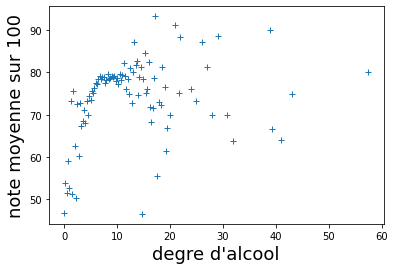

nombre de points pris en compte : 1518829


In [ ]:
n=m_abv.size
moyennes=np.zeros(n)
for i in range(n):
  moyennes[i]=np.sum(note_globale[np.where(abv_tronque==m_abv[i])])/np.sum(abv_tronque==m_abv[i])
plt.plot(m_abv,moyennes,'+')
plt.xlabel('degre d\'alcool', fontsize=18)
plt.ylabel('note moyenne sur 100', fontsize=18)
plt.show()
print('nombre de points pris en compte :',np.sum(n_abv))

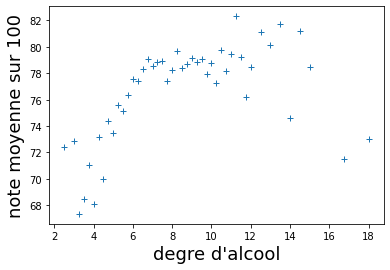

nombre de points pris en compte : 1512754 soit  99.60002080550214 % de nos donnees


In [ ]:
seuil=1000 #nb d'occurences minimums pour qu'on garde la valeur dans notre analyse
x=np.delete(m_abv,np.where(n_abv<seuil))
y=np.delete(moyennes,np.where(n_abv<seuil))
plt.plot(x,y,'+')
plt.xlabel('degre d\'alcool', fontsize=18)
plt.ylabel('note moyenne sur 100', fontsize=18)
plt.show()
#calcul du nombre d'observations qu'il nous reste
nb_observations=0
for abv in x:
  nb_observations += n_abv[np.where(m_abv==abv)][0]
print('nombre de points pris en compte :',nb_observations, 'soit ',nb_observations*100/np.sum(n_abv),'% de nos donnees')

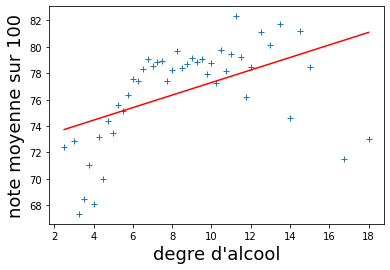

R²= 0.24080426708721883


In [ ]:
alpha,R2,_,_=reg(x,y)
plt.plot(x,y,'+')
plt.plot(x,x*alpha[0]+alpha[1],'-r')
plt.xlabel('degre d\'alcool', fontsize=18)
plt.ylabel('note moyenne sur 100', fontsize=18)
plt.show()
print('R²=',R2)

Comme on pouvait le voir sur le graphique précédent, une régression simple ne semble pas correspondre à nos données.
Essayons alors une régression d'ordre 2 et plus.

In [ ]:
#on commence par creer une fonction qui renvoie le vecteur composé de (x^ordre,x^(ordre-1),...x^2,x)
def reg_fit_ordre(x_,ordre):
  X_=x_
  for i in range(2,ordre+1):
    X_=np.column_stack((x_**i,X_))
  return X_

R²= 0.7254361957509393


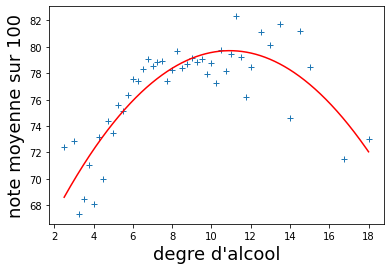

In [ ]:
#faisons un test
ordre_regression=3
X=reg_fit_ordre(x,ordre_regression)
alpha,R2,_,_=reg(X,y)
print('R²=',R2)
#affichage des resultats
nb_points_abscisse=1000
xtemp=np.linspace(x.min(),x.max(),nb_points_abscisse)
x_fit=reg_fit_ordre(xtemp,ordre_regression)
z=(np.column_stack((x_fit,np.ones(nb_points_abscisse))))@alpha
plt.plot(x,y,'+')
plt.plot(xtemp,z,'-r')
plt.xlabel('degre d\'alcool', fontsize=18)
plt.ylabel('note moyenne sur 100', fontsize=18)
plt.show()

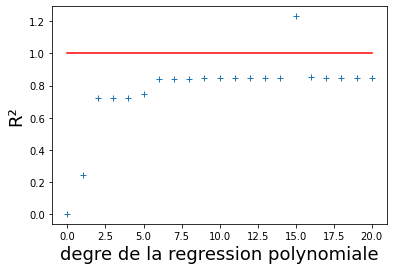

In [ ]:
#faisons les regressions polynomiales jusqu'à certain degré max
ordre_max = 20
tab_R2=np.zeros(ordre_max+1)
X=reg_fit_ordre(x,ordre_max)
tab_R2[0]=0#l'ordre 0 correspond à la moyenne par conséquent, R2=0 dans ce cas
for i in range(1,ordre_max + 1):
  _,tab_R2[i],_,_=reg(X[:,ordre_max-i:],y);
plt.plot(np.arange(ordre_max+1),tab_R2,'+')
plt.plot(np.arange(ordre_max+1),np.ones(ordre_max+1),'-r')
plt.xlabel('degre de la regression polynomiale', fontsize=18)
plt.ylabel('R²', fontsize=18)
plt.show()

Forward selection pour selectionner la meilleur combinaison de degres :

In [ ]:
ord_max=10
#initialisation
X_complet=reg_fit_ordre(x,ord_max)
n,p=X_complet.shape
var_in = []
var_out = [x for x in range(p)]
liste_Cp_f = []
#calcul du modèle complet
_,_,s2_complet,_=reg(X,y)
#forward selection
for i in range(p):
  liste_R2=[]
  liste_s2=[]
  for j in range(len(var_out)):
    liste_var_temp=var_in + [var_out[j]]
    x_courant=X_complet[:,liste_var_temp]
    _,R2_temp,s2_temp,_=reg(x_courant,y)
    liste_R2.append(R2_temp)
    liste_s2.append(s2_temp)
  #on garde le meilleur ajout
  ind_best=np.argmax(liste_R2)
  R2_best = liste_R2[ind_best]
  s2_best = liste_s2[ind_best]
  pi = i + 1
  liste_Cp_f.append((n-pi)*s2_best/s2_complet-n+2*pi)
  var_in.append(var_out[ind_best])
  var_out.remove(var_out[ind_best])

ordre_ajout = np.array(var_in.copy())
deg_fselection=ord_max-np.array(var_in)
print('on selectionne les degrés du monome à ajouter dans la régression selon l\'ordre suivante : \n',deg_fselection)

on selectionne les degrés du monome à ajouter dans la régression selon l'ordre suivante : 
 [ 1  2  4  7  3  5  6 10  8  9]


Backward selection pour selectionner la meilleur combinaison de degres :

In [ ]:
ord_max=10
#initialisation
X_complet=reg_fit_ordre(x,ord_max)
n,p=X_complet.shape
var_in = [x for x in range(p)]
var_out = []
liste_Cp_b = []
#calcul du modèle complet
_,_,s2_complet,_=reg(X,y)
#forward selection
for i in range(p):
  liste_R2=[]
  liste_s2=[]
  for j in range(len(var_in)):
    liste_var_temp=var_in + var_out
    liste_var_temp.remove(var_in[j])
    x_courant=X_complet[:,liste_var_temp]
    _,R2_temp,s2_temp,_=reg(x_courant,y)
    liste_R2.append(R2_temp)
    liste_s2.append(s2_temp)
  #on enlève la pire regression
  ind_best=np.argmax(liste_R2)
  R2_best = liste_R2[ind_best]
  s2_best = liste_s2[ind_best]
  pi = i + 1
  liste_Cp_b.append((n-pi)*s2_best/s2_complet-n+2*pi)
  var_out.append(var_in[ind_best])
  var_in.remove(var_in[ind_best])

ordre_retrait = np.array(var_out.copy())
deg_bselection=ord_max-np.array(var_out)
print('on selectionne le degré du monome à retirer du modèle de la régression selon l\'ordre suivante : \n',deg_bselection)

on selectionne le degré du monome à retirer du modèle de la régression selon l'ordre suivante : 
 [10  9  8  7  6  5  1  4  2  3]


In [ ]:
tab=np.vstack((np.arange(ord_max)+1,deg_fselection,liste_Cp_f,deg_bselection,liste_Cp_b))
column=['iteration','degre ajoute','Cp_modele','degre retire','Cp_modele']
print(tabulate(np.column_stack((column,tab)),numalign='right',tablefmt='fancy_grid'))

╒══════════════╤═════════╤═════════╤═════════╤════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│ iteration    │       1 │       2 │       3 │      4 │       5 │       6 │       7 │       8 │       9 │      10 │
├──────────────┼─────────┼─────────┼─────────┼────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ degre ajoute │       1 │       2 │       4 │      7 │       3 │       5 │       6 │      10 │       8 │       9 │
├──────────────┼─────────┼─────────┼─────────┼────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ Cp_modele    │ 182.625 │ 38.1416 │ 38.3134 │ 38.407 │ 35.8328 │ 8.93146 │ 9.60246 │ 10.2365 │ 10.0775 │ 10.9942 │
├──────────────┼─────────┼─────────┼─────────┼────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ degre retire │      10 │       9 │       8 │      7 │       6 │       5 │       1 │       4 │       2 │       3 │
├──────────────┼─────────┼─────────┼─────────┼────────┼─────────┼───────

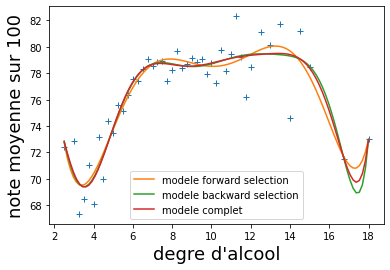

╒═════════════════════╤══════════╕
│ modele regression   │       R² │
╞═════════════════════╪══════════╡
│ forward selection   │ 0.838201 │
├─────────────────────┼──────────┤
│ backward_selection  │ 0.844954 │
├─────────────────────┼──────────┤
│ complet             │ 0.84526  │
╘═════════════════════╧══════════╛


In [ ]:
n=X_complet.shape[0]
#regression des deux modeles
ibestCp_f=np.argmin(liste_Cp_f)
Xbest_f=X_complet[:,ordre_ajout[:ibestCp_f+1]]
A_f,R2_f,_,_=reg(Xbest_f,y)
ibestCp_b=np.argmin(liste_Cp_b)
Xbest_b=X_complet[:,ordre_retrait[ibestCp_b+1:]]
A_b,R2_b,_,_=reg(Xbest_b,y)
#regression complet
A_complet,R2_complet,_,_=reg(X_complet,y)
#affichage des deux modeles
x_plot=np.linspace(x.min(),x.max(),100)
nb_points_plot=x_plot.size
z_f=np.column_stack((x_plot[:,None]**deg_fselection[:ibestCp_f+1],np.ones(nb_points_plot)))@A_f
z_b=np.column_stack((x_plot[:,None]**deg_bselection[ibestCp_b+1:],np.ones(nb_points_plot)))@A_b
z_complet=np.column_stack((reg_fit_ordre(x_plot,ord_max),np.ones(nb_points_plot)))@A_complet
plt.plot(x,y,'+')
plt.plot(x_plot,z_f,label='modele forward selection')
plt.plot(x_plot,z_b,label='modele backward selection')
plt.plot(x_plot,z_complet,label='modele complet')
plt.xlabel('degre d\'alcool', fontsize=18)
plt.ylabel('note moyenne sur 100', fontsize=18)
plt.legend()
plt.show()
print(tabulate([['forward selection',R2_f],
                ['backward_selection',R2_b],
                ['complet',R2_complet]],
               headers=['modele regression','R²'],tablefmt='fancy_grid'))

# III - Tests statistiques

1 - Test de student sur la pente de la première régression

In [ ]:
#Reprenons les variables de la première regression
dates_semaine=data['review_time']//(3600*24*7)
semaine1=np.min(dates_semaine)
dates_semaine=dates_semaine-semaine1
msemaine,nsemaine=np.unique(dates_semaine,return_counts=True)
x=np.delete(msemaine,np.where(msemaine<300))
y=np.delete(nsemaine,np.where(msemaine<300))
matA,_,s2,_=reg(x,y)
sx2=np.sum((x-x.mean())**2)/x.size
a=matA[0]

In [ ]:
T=np.abs(a/np.sqrt(s2/sx2))
print('t=',T)
ddl=x.size-2
from scipy.stats import t
pvalue_reg=2*t.sf(T,ddl)
print('p-value =',pvalue_reg)

t= 3.9684584914446632
p-value = 8.290877282441534e-05


In [ ]:
from scipy.stats import ttest_ind
ttest_ind(x,y,)

Ttest_indResult(statistic=-29.8646622320824, pvalue=9.363414134083985e-141)

2 - Distance du $\chi_2$ entre les différentes notes

In [ ]:
notes=np.column_stack((data['review_overall'],data['review_aroma'],data['review_appearance'],data['review_palate'],data['review_taste']))
nb_notes=notes.shape[1]
#trop petits effectifs inférieurs à 1 donc on les regroupe
notes[np.where(notes<1)]=1
nb_notes

5

In [ ]:
from sklearn.metrics.cluster import contingency_matrix
from scipy.stats import chi2_contingency
tab_Dchi2,tab_pvalue_chi2,tab_ddl=np.zeros((nb_notes,nb_notes)),np.zeros((nb_notes,nb_notes)),np.zeros((nb_notes,nb_notes))
for j in range(nb_notes):
  for i in range(nb_notes):
    O=contingency_matrix(notes[:,i],notes[:,j])
    tab_Dchi2[i,j],tab_pvalue_chi2[i,j],tab_ddl[i,j],_=chi2_contingency(O)


In [ ]:
print(tab_Dchi2)
print(tab_ddl)
print(tab_pvalue_chi2)

[[12150632.          1195032.72443571   698844.85282976  1666074.61651967
   2638189.157255  ]
 [ 1195032.72443571 12150632.          1070804.86728111  1222340.63414518
   1800467.16283181]
 [  698844.85282976  1070804.86728111 12150632.          1063612.84553283
    859428.90570918]
 [ 1666074.61651968  1222340.63414518  1063612.84553283 12150632.
   1901869.06776792]
 [ 2638189.157255    1800467.16283181   859428.90570918  1901869.06776792
  12150632.        ]]
[[64. 64. 64. 64. 64.]
 [64. 64. 64. 64. 64.]
 [64. 64. 64. 64. 64.]
 [64. 64. 64. 64. 64.]
 [64. 64. 64. 64. 64.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
